In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [29]:
def Read_data(folderName, CompanyNameList, df):
    ###   Read Data from given file reflect to industry and company
    ###   make date become df for searching
    for i in len(CompanyNameList):
        df[i] = pd.read_csv(f"~/Documents/GitHub/MAST90106/data/{folderName}/{CompanyNameList[i]}.csv")
        set_date_timeseries(df[i])
        
    return df

In [279]:
def average_share_price(df):
    ### Return share price based on month and year in DataFrame
    y = df.iloc[0,]["Date"][0:4]
    year = int(y)
    
    # make date into timeseries for use, with diff file
    df_ts = set_date_timeseries(df)
    
    month_average = {}
    year_average = {}
    
    # calculate average price in monthly
    while year < 2021:
        #print(year)
        for i in range(1,13):
            try:
                #print(i)
                ave_m = df_ts[f'{year}-{i}'].mean()
                #print(ave_m)
                month_average[f"{year}-{i}"] = ave_m["Adj Close"]
                #print(month_average)
                
            except:
                pass
    
    # calculate average price in yearly
        ave_y = df_ts[f'{year}'].mean()
        year_average[f"{year}"] = ave_y["Adj Close"]
        year += 1
    
    # create month base data and add return of month price into df
    df_month  = pd.DataFrame(month_average.items(), columns = ["Date", "average_price"])
    df_m = calculate_price_return(df_month)
    
    # create year base data and add return of year price into df
    df_year = pd.DataFrame(year_average.items(), columns = ["Date", "average_price"])
    df_y = calculate_price_return(df_year)
    
    
    df_ts_m = set_date_timeseries(df_m)
    #df_ts_m.drop(["Date"], axis = 1, inplace = True)
    #df_month.drop(["Year - Month"], axis = 1, inplace = True)
    
    df_ts_y = set_date_timeseries(df_y)
    #df_ts_y.drop(["Date"], axis = 1, inplace = True)
    #df_year.drop(["Year"], axis = 1, inplace = True)
    
    return df_m, df_y, df_ts, df_ts_m, df_ts_y




In [127]:
def set_date_timeseries(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df_ts = df.set_index("Date", inplace = False)
    return df_ts


In [128]:
def set_month_timeseries(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year - Month'] = df['Date'].map(lambda x: 1000*x.year + x.month)
    df_ts = df.set_index("Year - Month", inplace = False)
    return df_ts

In [129]:
def set_year_timeseries(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df_ts = df.set_index("Year", inplace = False)
    return df_ts


In [217]:
def calculate_price_return(df):
    ### add new colunm with return of price
    
    
    return_list = []
    for i in range(len(df["average_price"])):
        if i == 0:
            return_list.append(0)
        else:
            r = (df["average_price"][i] - df["average_price"][i - 1]) / df["average_price"][i - 1]
            return_list.append(r)
    df["return"] = return_list
    df.drop([0], axis = 0, inplace = True)
    return df



In [ ]:
def process_company_data(df):
    DF = []
    df_m, df_y, df_ts, df_ts_m, df_ts_y = average_share_price(df)
    DF.append(df)
    DF.append(df_ts)
    DF.append(df_m)
    DF.append(df_ts_m)
    DF.append(df_y)
    DF.append(df_ts_y)
    
    
    return DF

In [293]:
a = []

TypeError: append() takes exactly one argument (2 given)

In [280]:
df1 = pd.read_csv("~/Documents/GitHub/MAST90106/data/agriculture/YTEN.csv")
df1


,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-11-10,39000.00,33816.00,34200.00,37248.00,1796.0,37248.00
1,2006-11-13,39840.00,37632.00,37632.00,38376.00,316.0,38376.00
2,2006-11-14,39096.00,35520.00,39096.00,36600.00,113.0,36600.00
3,2006-11-15,38400.00,36000.00,36936.00,38400.00,84.0,38400.00
4,2006-11-16,44688.00,38640.00,38664.00,43800.00,141.0,43800.00
...,...,...,...,...,...,...,...
3554,2020-12-24,6.12,5.84,6.12,5.93,26400.0,5.93
3555,2020-12-28,6.02,5.71,6.02,5.83,43000.0,5.83
3556,2020-12-29,6.10,5.54,5.85,5.76,36300.0,5.76
3557,2020-12-30,5.87,5.72,5.84,5.84,24200.0,5.84


In [281]:
dfm, dfy, dfts, dftsm, dftsy = average_share_price(df1)

In [302]:
dftsm

,average_price,return
Date,,
2006-12-01,43687.200000,0.092664
2007-01-01,40216.800000,-0.079437
2007-02-01,42425.684211,0.054924
2007-03-01,41146.909091,-0.030142
2007-04-01,46262.400000,0.124323
...,...,...
2020-08-01,5.470952,-0.128703
2020-09-01,6.691429,0.223083
2020-10-01,6.540454,-0.022562


In [284]:
dftsy["2007"]

,average_price,return
Date,,
2007-01-01,51686.055777,0.225902


In [275]:
dftsm["200612"]

KeyError: '200612'

In [298]:
dfmm

,Date,average_price,return
1,2006-12,43687.200000,0.092664
2,2007-1,40216.800000,-0.079437
3,2007-2,42425.684211,0.054924
4,2007-3,41146.909091,-0.030142
5,2007-4,46262.400000,0.124323
...,...,...,...
165,2020-8,5.470952,-0.128703
166,2020-9,6.691429,0.223083
167,2020-10,6.540454,-0.022562
168,2020-11,6.146000,-0.060310


In [266]:
dfy

,Date,average_price,return
1,2007,51686.055777,0.225902
2,2008,28202.940711,-0.454341
3,2009,21815.809524,-0.226470
4,2010,30012.095238,0.375704
5,2011,16595.619048,-0.447036
6,2012,5255.616000,-0.683313
7,2013,3665.142857,-0.302624
8,2014,2206.190476,-0.398062
9,2015,1236.126984,-0.439701
10,2016,362.523810,-0.706726


In [239]:
dfts

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-11-10,39000.00,33816.00,34200.00,37248.00,1796.0,37248.00
2006-11-13,39840.00,37632.00,37632.00,38376.00,316.0,38376.00
2006-11-14,39096.00,35520.00,39096.00,36600.00,113.0,36600.00
2006-11-15,38400.00,36000.00,36936.00,38400.00,84.0,38400.00
2006-11-16,44688.00,38640.00,38664.00,43800.00,141.0,43800.00
...,...,...,...,...,...,...
2020-12-24,6.12,5.84,6.12,5.93,26400.0,5.93
2020-12-28,6.02,5.71,6.02,5.83,43000.0,5.83
2020-12-29,6.10,5.54,5.85,5.76,36300.0,5.76


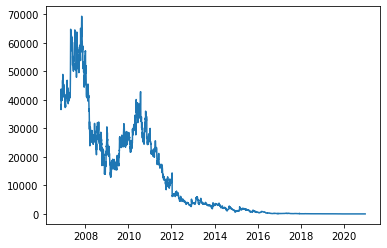

In [240]:
plt.plot(dfts["Close"])

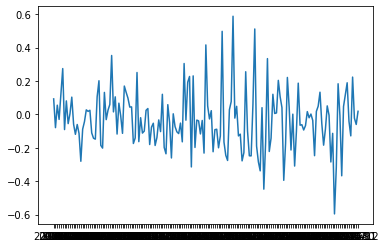

In [301]:
plt.plot(dfmm["Date"], dfmm["return"] )

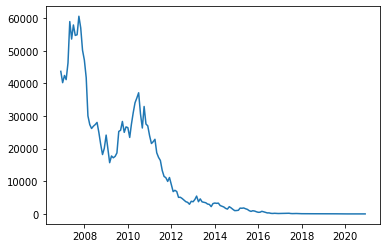

In [286]:
plt.plot(dftsm["average_price"])